# スキャニング

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
# Callback Function for Thackbar (but do not any work)
def nothing(x):
    pass

In [40]:
def global_threshold():
    imgfile = 'images/document1.jpg'
    img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)
    
    r = 800.0 / img.shape[0]
    dim = (int(img.shape[1] * r), 800)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    WindowName = "Window"
    TrackbarName = "Threshold"
    
    cv2.namedWindow(WindowName)
    cv2.createTrackbar(TrackbarName, WindowName, 150, 255, nothing)
    
    Threshold = np.zeros(img.shape, np.uint8)
    
    while True:
        TrackbarPos = cv2.getTrackbarPos(TrackbarName, WindowName)
        cv2.threshold(img, TrackbarPos, 255, cv2.THRESH_BINARY, Threshold)
        cv2.imshow(WindowName, Threshold)
        
        k = cv2.waitKey(0)
        if k == 27:
            cv2.destroyAllWindows()
            cv2.waitKey(1)
            break
    
    fig, axs = plt.subplots(nrows=1, ncols=2)
    fig.tight_layout()
    axs[0].set_title('original(grayscaled)')
    axs[0].imshow(img)
    axs[1].set_title('Threshold')
    axs[1].imshow(Threshold)
    plt.show()
        
    return

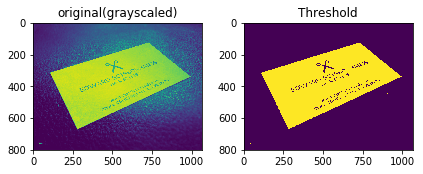

In [41]:
global_threshold()

In [88]:
def adaptive_threshold():
    imgfile = 'images/document1.jpg'
    img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)
    
    r = 800.0 / img.shape[0]
    dim = (int(img.shape[1] * r), 800)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    # 周辺pixelsの平均値を代入する効果を宣言
    blur = cv2.GaussianBlur(img, (9,9), 0)
    
    blockSize = 21 # thresholdを適用する 細切れしたblock を定義する
    c = 10 # 周辺pixelsの平均値から c を抜く
    result_without_blur = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,  blockSize, c)
    result_with_blur = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,  blockSize, c)

    fig, axs = plt.subplots(nrows=1, ncols=3)
    plt.subplots_adjust(right=1.8, wspace=0.4)
    
    #fig.tight_layout()
    axs[0].set_title('original(grayscaled)')
    axs[0].imshow(img)
    axs[1].set_title('Without Blur(Adaptive Threshold)')
    axs[1].imshow(result_without_blur)
    axs[2].set_title('With Blur(Adaptive Threshold)')
    axs[2].imshow(result_with_blur)
    plt.show()

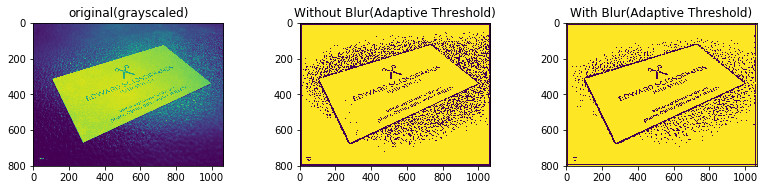

In [89]:
adaptive_threshold()